In [2]:
import sys
from tqdm import tqdm
sys.path.append("/home/sambt/analytic-qg-classifiers/analysis/utils/")
from master import *
prefix = '/home/sambt/pythia83-samples/optimal-classifiers/kernel-1/'

In [7]:
h2qq_samples = {"qgsame":prefix+'H2qq-CF3.0CA3.0-sqg0100-esq0000-r0.4/total.root', 
                "esq0001":prefix+'H2qq-CF3.0CA3.0-sqg0100-esq0001-r0.4/total.root', 
                "esq0011":prefix+'H2qq-CF3.0CA3.0-sqg0100-esq0011-r0.4/total.root'}
fg = prefix+'H2gg-CF3.0CA3.0-sqg0100-r0.4/total.root'
samples = list(h2qq_samples.keys())

In [8]:
z_collection = {}
eta_collection = {}
phi_collection = {}
dR_collection = {}
label_collection = {}
for samp, fq in h2qq_samples.items():
    X,Y = tools.pre_process(fq,fg,nev_max=50000)
    z = X[:,:,0].copy()
    dEta = X[:,:,1].copy()
    dPhi = X[:,:,2].copy()
    dR = np.sqrt(dEta**2 + dPhi**2)
    
    z_collection[samp] = z.copy()
    eta_collection[samp] = dEta.copy()
    phi_collection[samp] = dPhi.copy()
    dR_collection[samp] = dR.copy()
    label_collection[samp] = Y[:,1].copy()
    
    del X, Y, z, dEta, dPhi, dR

Loaded files at 0.08374857902526855
Read in arrays at 1.733924388885498
Cleaned events at 1.8162105083465576
Made quark/gluon input arrays at 4.283647298812866
Finished preprocessing at 10.19725751876831
Loaded files at 0.05263209342956543
Read in arrays at 1.5621309280395508
Cleaned events at 1.6427340507507324
Made quark/gluon input arrays at 4.220034837722778
Finished preprocessing at 10.095303297042847
Loaded files at 0.05240011215209961
Read in arrays at 1.5772242546081543
Cleaned events at 1.6572203636169434
Made quark/gluon input arrays at 4.280961275100708
Finished preprocessing at 10.189162254333496


In [11]:
exp_z = np.linspace(-3,3,num=31)
exp_theta = np.linspace(-3,3,num=31)

aucs_2d_collection = {}
for samp in samples:
    z = z_collection[samp]
    dR = dR_collection[samp]
    labs = label_collection[samp]
    aucs_2d = np.zeros((exp_z.size,exp_theta.size))
    for i, ez in enumerate(tqdm(exp_z)):
        for j, et in enumerate(exp_theta):
            zpow = np.power(z,ez,where=z>0.0,out=np.zeros(z.shape))
            rpow = np.power(dR,et,where=dR>0.0,out=np.zeros(dR.shape))
            opt = np.sum(zpow*rpow,axis=1)
            auc = roc_auc_score(labs,opt)
            if auc < 0.5:
                auc = 1-auc
            aucs_2d[i,j] = auc
    
    aucs_2d_collection[samp] = aucs_2d

100%|██████████| 31/31 [01:21<00:00,  2.62s/it]


In [4]:
aucs_2d_collection = {}
for samp in samples:
    aucs_2d_collection[samp] = np.load('angularity_scan_auc2d_grid_'+samp+'.npy')

0.5066885192 0.5000093048
0.5701015662 0.5000427662
0.6254932942 0.5002290538


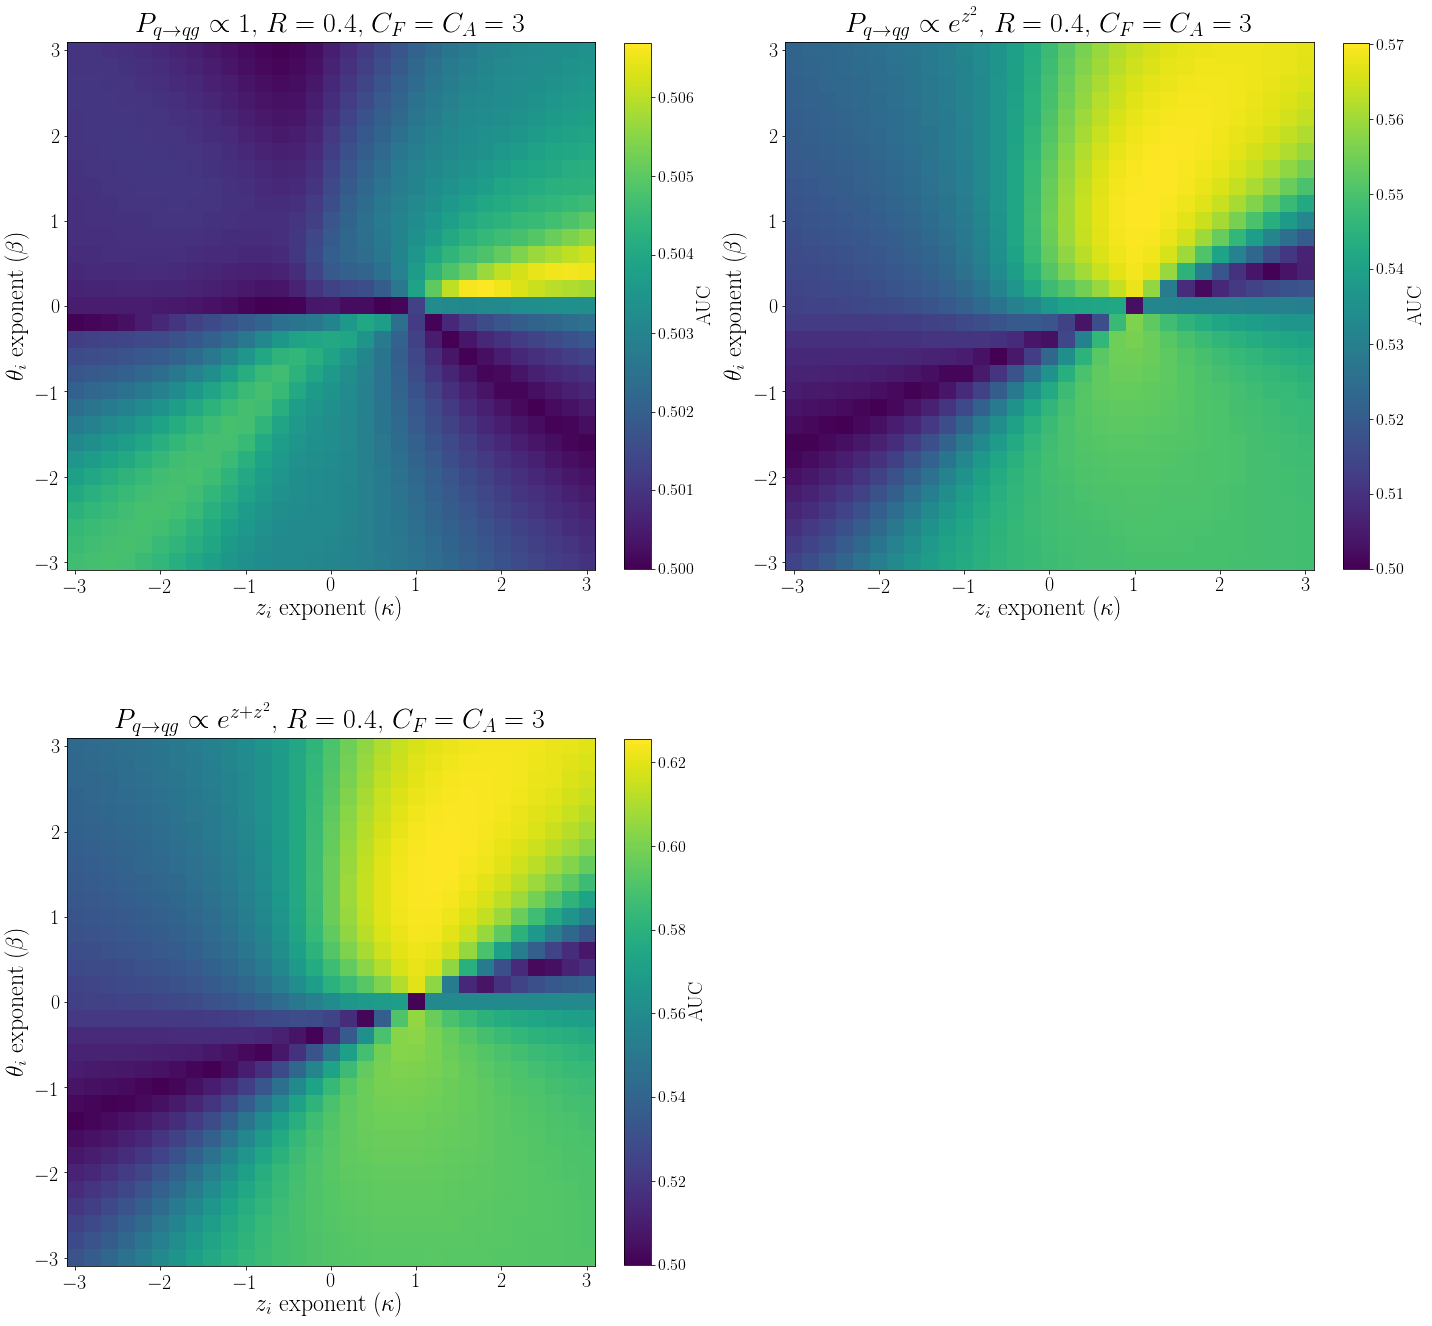

In [53]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.autolayout'] = True
plt.rcParams['text.usetex'] = True

titles = {"qgsame":r'$P_{q\to qg}\propto 1$, $R = 0.4$, $C_F = C_A = 3$',"esq0001":r'$P_{q\to qg} \propto e^{z^2}$, $R = 0.4$, $C_F = C_A = 3$',"esq0011":r'$P_{q\to qg} \propto e^{z+z^2}$, $R = 0.4$, $C_F = C_A = 3$'}
plt.figure(1,(20,20))
for i, samp in enumerate(samples):
    plt.subplot(2,2,i+1)
    aucs_2d = aucs_2d_collection[samp]
    print(aucs_2d.max(),aucs_2d.min())
    auc_grid = plt.imshow(aucs_2d.transpose(),origin='lower',extent=(-3.1,3.1,-3.1,3.1),vmin=0.50,vmax=aucs_2d.max())
    plt.title(titles[samp],fontsize=28)
    #plt.colorbar(auc_grid)
    bar = plt.colorbar(auc_grid,fraction=0.045)
    bar.ax.tick_params(labelsize=16)
    bar.set_label("AUC",fontsize=20)
    plt.xlabel(r"$z_i$ exponent ($\kappa$)",fontsize=24)
    plt.ylabel(r"$\theta_i$ exponent ($\beta$)",fontsize=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
#plt.tight_layout()
plt.savefig("plots/angularity_scans_r0.4.pdf")

0.5066885192 0.5000093048
0.5701015662 0.5000427662
0.6254932942 0.5002290538


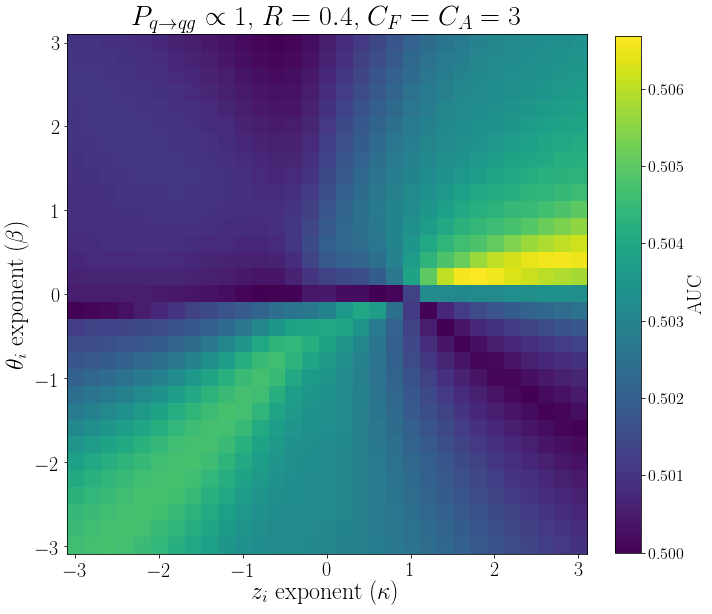

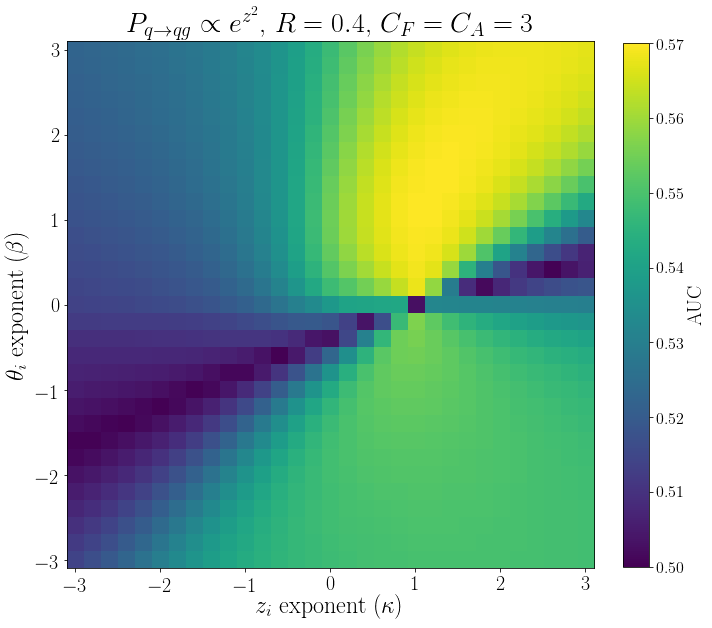

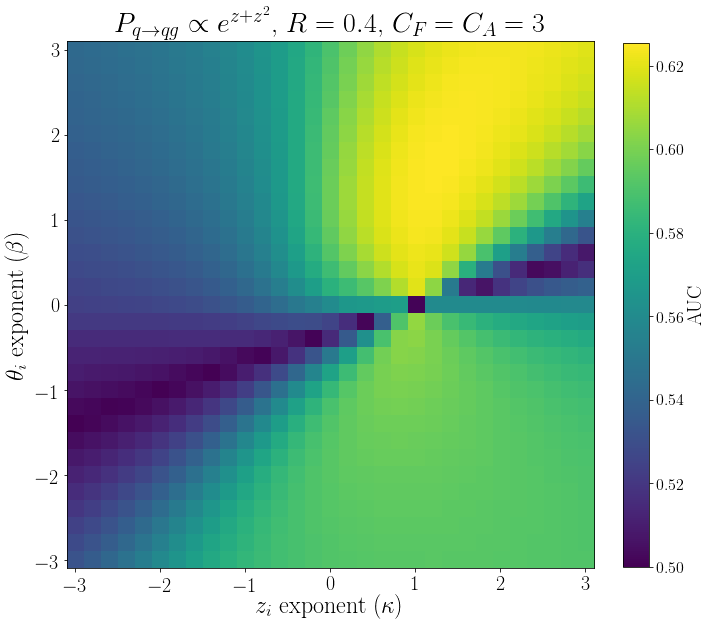

In [55]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.autolayout'] = True
plt.rcParams['text.usetex'] = True

titles = {"qgsame":r'$P_{q\to qg}\propto 1$, $R = 0.4$, $C_F = C_A = 3$',"esq0001":r'$P_{q\to qg} \propto e^{z^2}$, $R = 0.4$, $C_F = C_A = 3$',"esq0011":r'$P_{q\to qg} \propto e^{z+z^2}$, $R = 0.4$, $C_F = C_A = 3$'}
for i, samp in enumerate(samples):
    plt.figure(figsize=(10,10))
    aucs_2d = aucs_2d_collection[samp]
    print(aucs_2d.max(),aucs_2d.min())
    auc_grid = plt.imshow(aucs_2d.transpose(),origin='lower',extent=(-3.1,3.1,-3.1,3.1),vmin=0.50,vmax=aucs_2d.max())
    plt.title(titles[samp],fontsize=28)
    #plt.colorbar(auc_grid)
    bar = plt.colorbar(auc_grid,fraction=0.045)
    bar.ax.tick_params(labelsize=16)
    bar.set_label("AUC",fontsize=20)
    plt.xlabel(r"$z_i$ exponent ($\kappa$)",fontsize=24)
    plt.ylabel(r"$\theta_i$ exponent ($\beta$)",fontsize=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.savefig("plots/angularity_scan_"+samp+"_r0.4.pdf")

In [24]:
np.save("saved_numpy_data/angularity_scan_exp_z_r0.4",exp_z)
np.save("saved_numpy_data/angularity_scan_exp_theta_r0.4",exp_theta)
for i, samp in enumerate(samples):
    aucs_2d = aucs_2d_collection[samp]
    np.save("saved_numpy_data/angularity_scan_auc_grid_"+samp+"_r0.4",aucs_2d)

Analyzing sample qgsame
0th worst AUC is 0.500009 at kappa = 2.40, beta = -1.20
0th best AUC is 0.506689 at kappa = 1.80, beta = 0.20
1th worst AUC is 0.500014 at kappa = -0.80, beta = 0.00
1th best AUC is 0.506586 at kappa = 1.60, beta = 0.20
2th worst AUC is 0.500019 at kappa = 1.40, beta = -0.40
2th best AUC is 0.506558 at kappa = 2.80, beta = 0.40
3th worst AUC is 0.500022 at kappa = 0.60, beta = 0.00
3th best AUC is 0.506553 at kappa = 2.60, beta = 0.40
4th worst AUC is 0.500029 at kappa = -3.00, beta = -0.20
4th best AUC is 0.506550 at kappa = 2.00, beta = 0.20
5th worst AUC is 0.500030 at kappa = 3.00, beta = -1.60
5th best AUC is 0.506530 at kappa = 3.00, beta = 0.40
6th worst AUC is 0.500036 at kappa = 1.60, beta = -0.60
6th best AUC is 0.506450 at kappa = 2.40, beta = 0.40
7th worst AUC is 0.500050 at kappa = -0.60, beta = 3.00
7th best AUC is 0.506335 at kappa = 2.20, beta = 0.20
8th worst AUC is 0.500051 at kappa = -0.60, beta = 0.00
8th best AUC is 0.506267 at kappa = 2.20

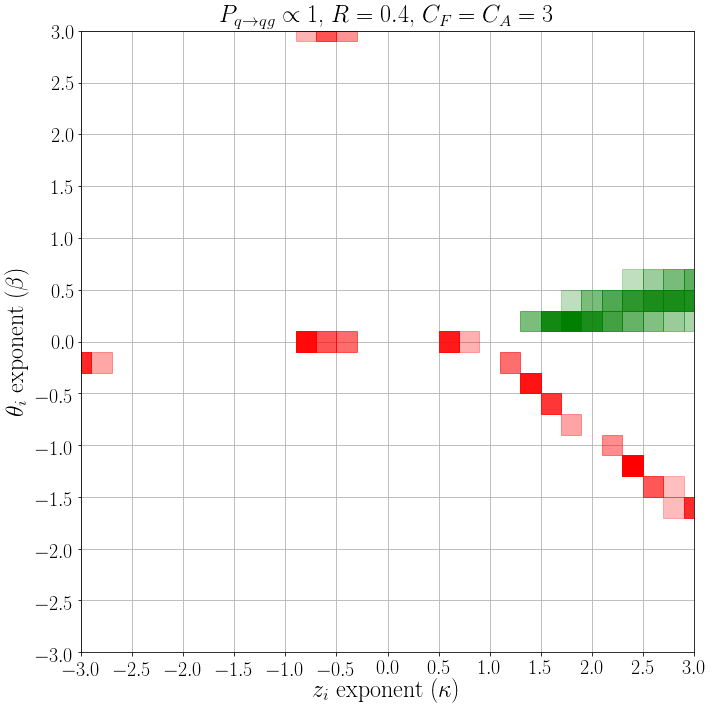

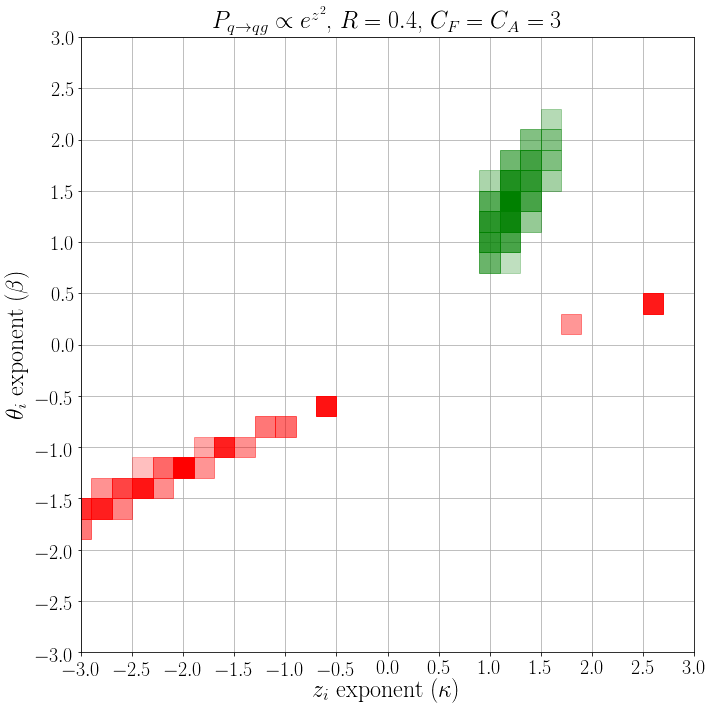

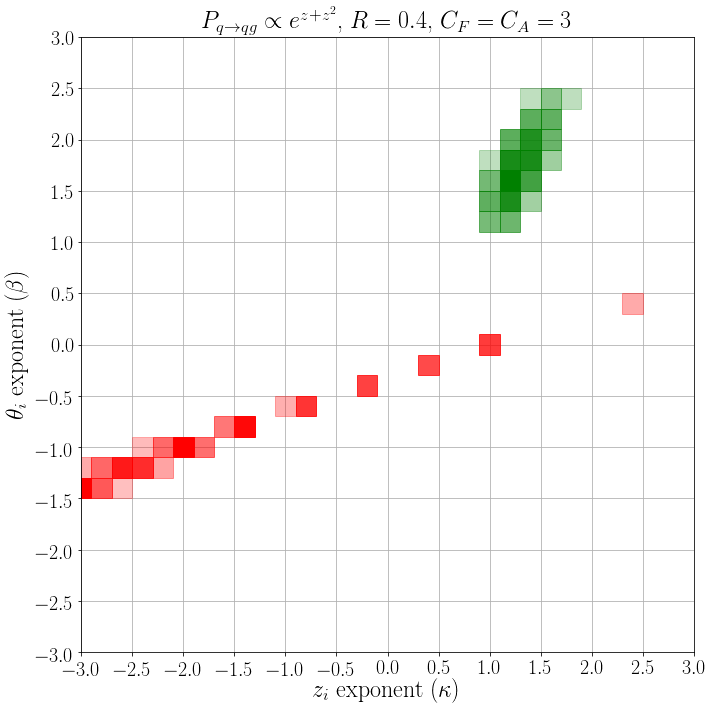

In [56]:
import matplotlib.patches as patches
for i, samp in enumerate(samples):
    print("Analyzing sample "+samp)
    aucs_2d = aucs_2d_collection[samp]
    n = 20
    worst = np.argsort(aucs_2d,axis=None)
    worst_kappas = []
    best_kappas = []
    worst_betas = []
    best_betas = []
    best_aucs = []
    worst_aucs = []
    for k in range(n):
        ix_bad, iy_bad = np.unravel_index(worst[k],aucs_2d.shape)
        k_bad = exp_z[ix_bad]
        b_bad = exp_theta[iy_bad]
        auc_bad = aucs_2d[ix_bad,iy_bad]
        worst_kappas.append(k_bad)
        worst_betas.append(b_bad)
        worst_aucs.append(auc_bad)
        print("{0}th worst AUC is {1:.6f} at kappa = {2:.2f}, beta = {3:.2f}".format(k,aucs_2d[ix_bad,iy_bad],exp_z[ix_bad],exp_theta[iy_bad]))

        ix_good, iy_good = np.unravel_index(worst[-1-k],aucs_2d.shape)
        k_good = exp_z[ix_good]
        b_good = exp_theta[iy_good]
        auc_good = aucs_2d[ix_good,iy_good]
        best_kappas.append(k_good)
        best_betas.append(b_good)
        best_aucs.append(auc_good)
        print("{0}th best AUC is {1:.6f} at kappa = {2:.2f}, beta = {3:.2f}".format(k,aucs_2d[ix_good,iy_good],exp_z[ix_good],exp_theta[iy_good]))
    plt.figure(figsize=(10,10))
    ax = plt.gca()
    best_aucs = np.array(best_aucs)
    worst_aucs = np.array(worst_aucs)
    alpha_good = tools.mapto(best_aucs,0.25,1)
    alpha_bad = tools.mapto(-worst_aucs,0.25,1)
    alpha_good = np.clip(alpha_good,0.25,1)
    alpha_bad = np.clip(alpha_bad,0.25,1)
    plt.xlim([-3,3])
    plt.ylim([-3,3])
    plt.gca().set_xticks(np.linspace(-3,3,num=13))
    plt.gca().set_yticks(np.linspace(-3,3,num=13))
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid(zorder=1)
    for i in range(n):
        #plt.scatter(best_kappas[i],best_betas[i],s=144,color="green",alpha=alpha_good[i])
        #plt.scatter(worst_kappas[i],worst_betas[i],s=144,color="red",alpha=alpha_bad[i])
        r1 = patches.Rectangle((best_kappas[i]-0.1,best_betas[i]-0.1),0.2,0.2,color="green",alpha=alpha_good[i],zorder=2)
        r2 = patches.Rectangle((worst_kappas[i]-0.1,worst_betas[i]-0.1),0.2,0.2,color="red",alpha=alpha_bad[i],zorder=2)
        ax.add_patch(r1)
        ax.add_patch(r2)
    plt.xlabel(r"$z_i$ exponent ($\kappa$)",fontsize=24)
    plt.ylabel(r"$\theta_i$ exponent ($\beta$)",fontsize=24)
    plt.title(titles[samp],fontsize=24)
    plt.savefig("plots/best{0}_angularities_".format(n)+samp+"_r0.4.pdf")
    print("----------------")

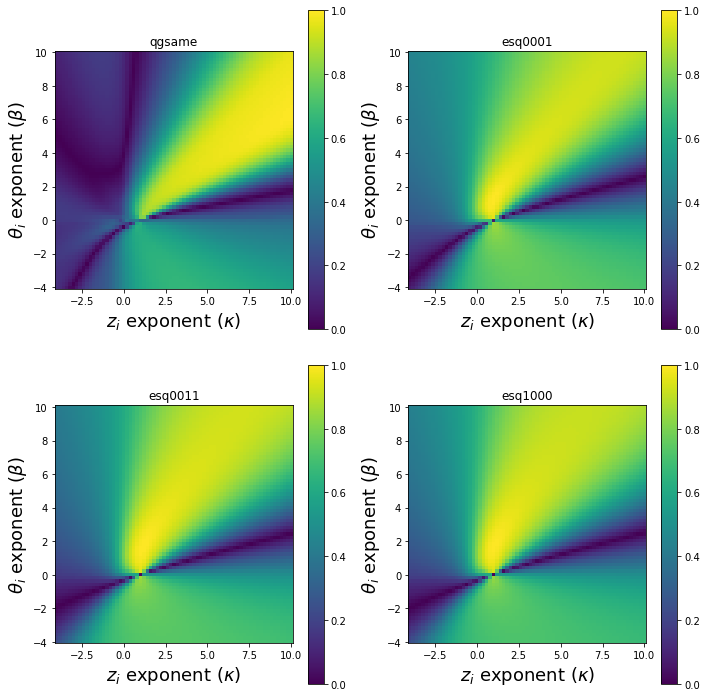

In [6]:
def mapto(arr,xmin,xmax):
    r = xmax - xmin
    d = arr.max() - arr.min()
    out = r*arr/d
    out = out - out.min() + xmin
    return out

plt.figure(2,(10,10))
for i, samp in enumerate(samples):
    plt.subplot(2,2,i+1)
    aucs_2d = aucs_2d_collection[samp]
    aucs_2d = mapto(aucs_2d,0,1)
    auc_grid = plt.imshow(aucs_2d.transpose(),origin='lower',extent=(-4.1,10.1,-4.1,10.1),vmin=0,vmax=1)
    plt.title(samp)
    plt.colorbar(auc_grid)
    plt.xlabel(r"$z_i$ exponent ($\kappa$)",fontsize=18)
    plt.ylabel(r"$\theta_i$ exponent ($\beta$)",fontsize=18)
plt.tight_layout()
plt.savefig("angularity_scan_all_normalized.pdf")

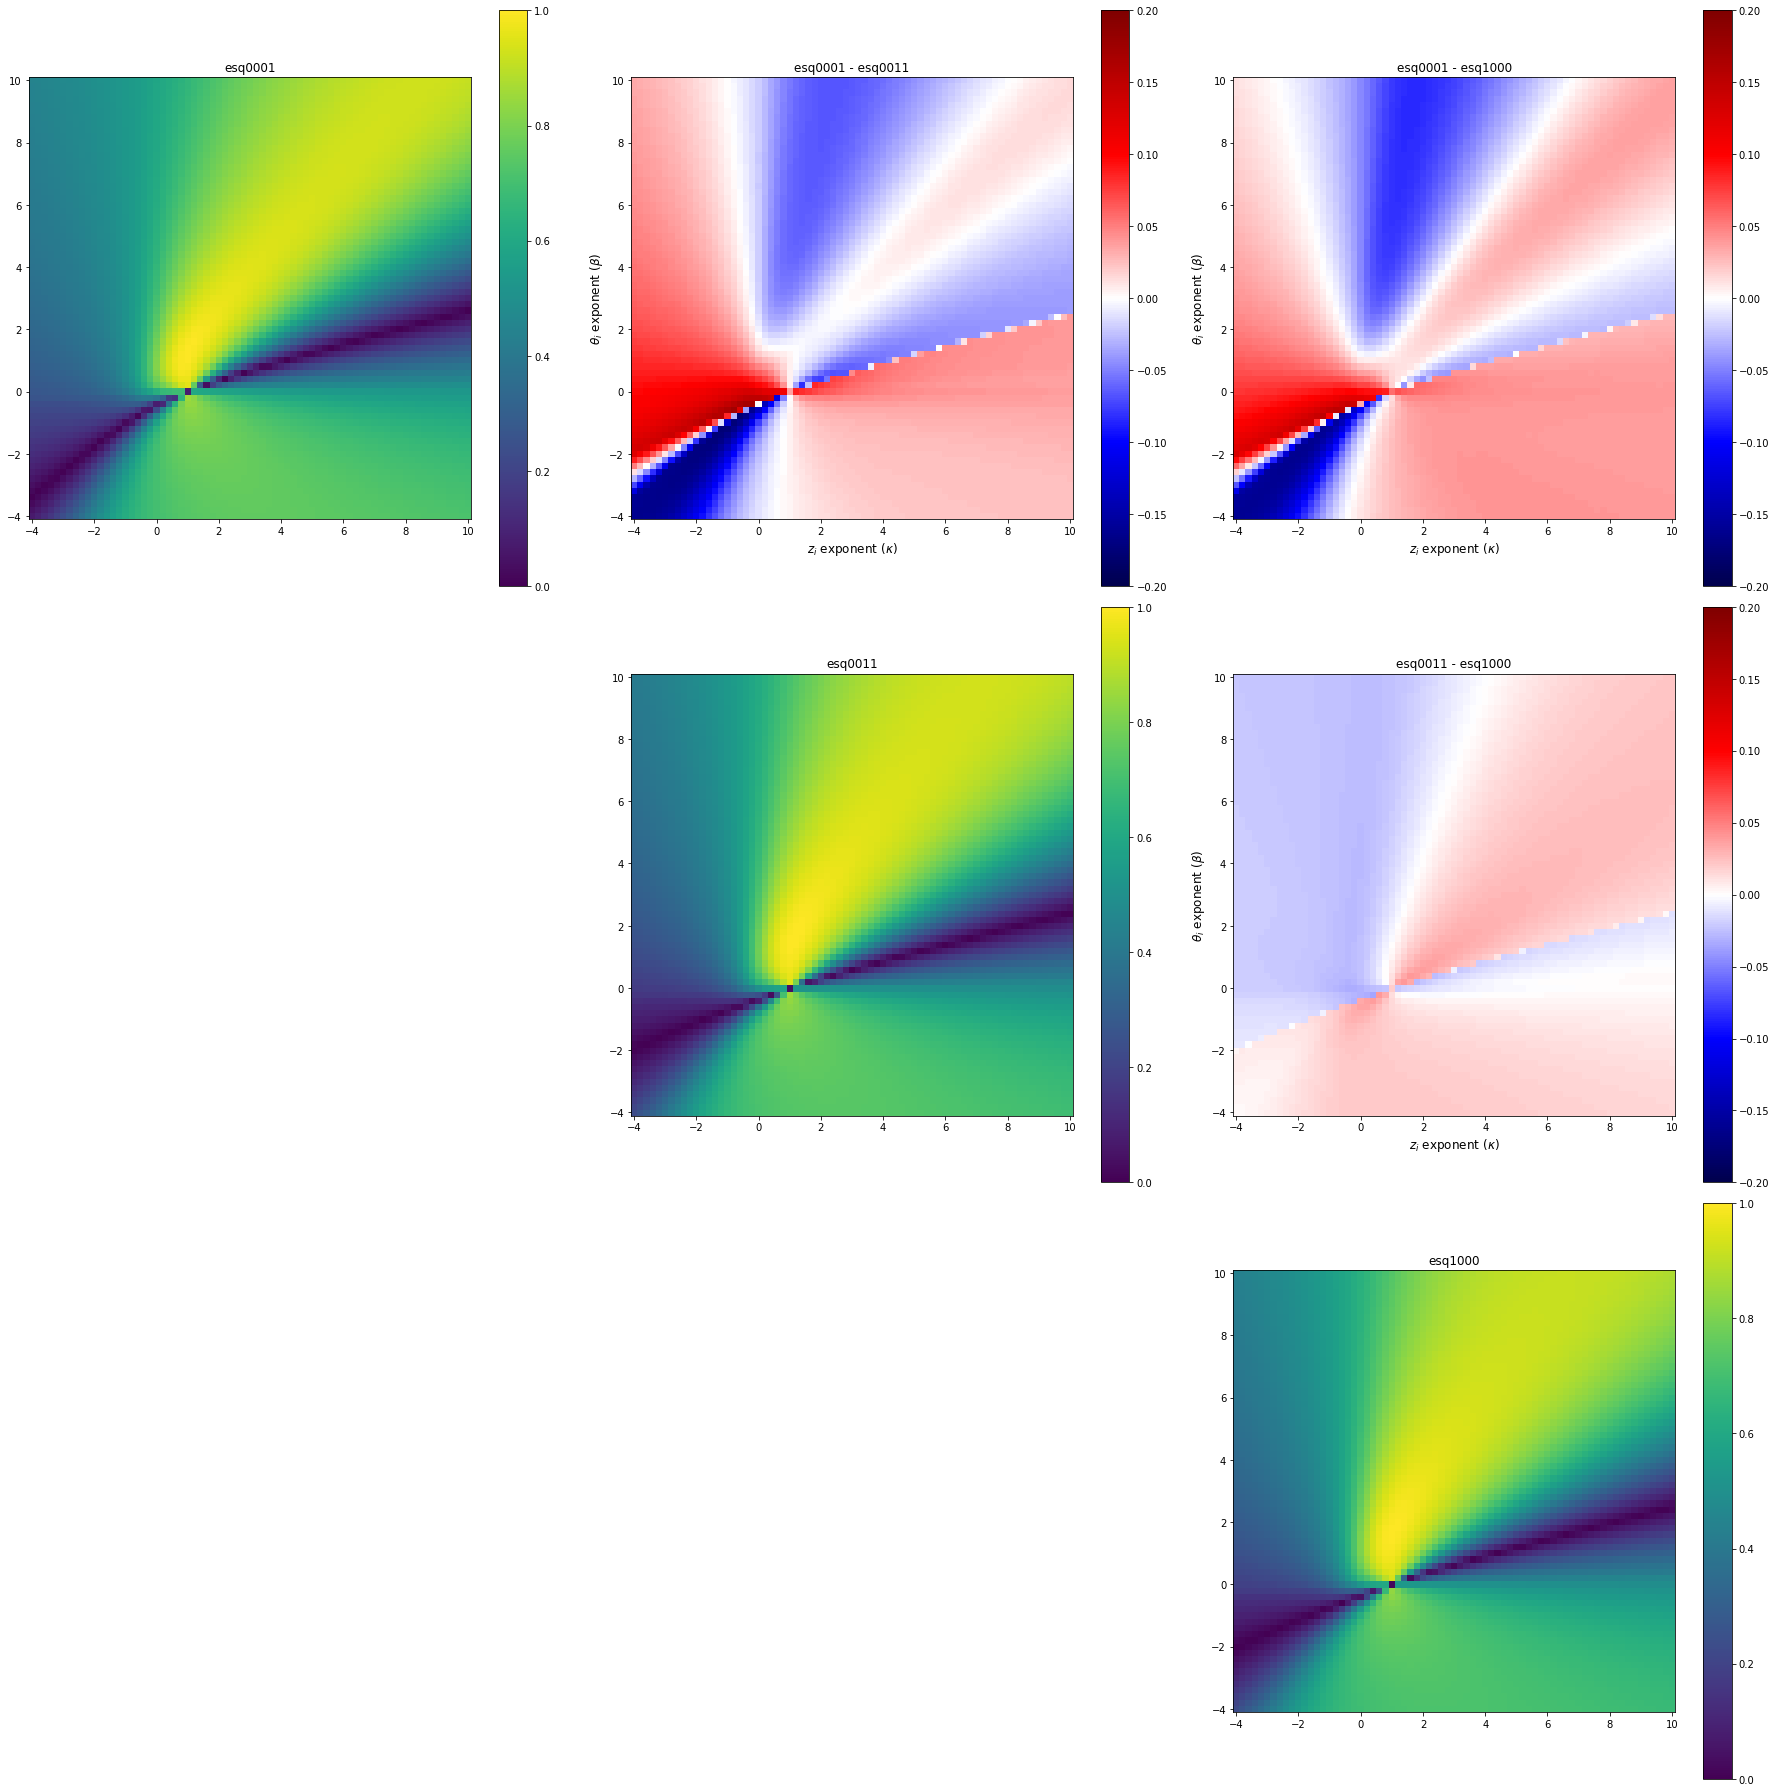

In [13]:
plt.figure(3,(25,25))
samples_reduced = ["esq0001","esq0011","esq1000"]
for i, samp1 in enumerate(samples_reduced):
    ref_auc2d = aucs_2d_collection[samp1]
    ref_auc2d = tools.mapto(ref_auc2d,0,1)
    plt.subplot(3,3,3*i+i+1)
    img = plt.imshow(ref_auc2d.transpose(),origin='lower',vmin=0,vmax=1,extent=(-4.1,10.1,-4.1,10.1))
    plt.title(samp1)
    plt.colorbar(img)
    for j in range(i+1,len(samples_reduced)):
        samp2 = samples_reduced[j]
        plt.subplot(3,3,3*i+j+1)
        diff_auc2d = aucs_2d_collection[samp2]
        diff_auc2d = tools.mapto(diff_auc2d,0,1)
        delta = ref_auc2d - diff_auc2d
        auc_grid = plt.imshow(delta.transpose(),origin='lower',extent=(-4.1,10.1,-4.1,10.1),vmin=-0.2,vmax=0.2,cmap='seismic')
        plt.title(samp1+" - "+samp2)
        plt.colorbar(auc_grid)
        plt.xlabel(r"$z_i$ exponent ($\kappa$)",fontsize=12)
        plt.ylabel(r"$\theta_i$ exponent ($\beta$)",fontsize=12)
plt.tight_layout()
plt.savefig("angularity_scan_difference_grid.pdf")

In [36]:
np.save("angularity_scan_z_exponents",exp_z)
np.save("angularity_scan_theta_exponents",exp_theta)
for samp in samples:
    np.save("angularity_scan_auc2d_grid_"+samp,aucs_2d_collection[samp])